In [ ]:
import time
import itertools
import os
from tqdm.notebook import tqdm

import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [ ]:
colors = np.array(['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 
                   'limegreen'])

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(
    n_samples=1000, 
    centers=np.array([
        [1, 1], 
        [4, -1],
        [3, 5]
    ])
)

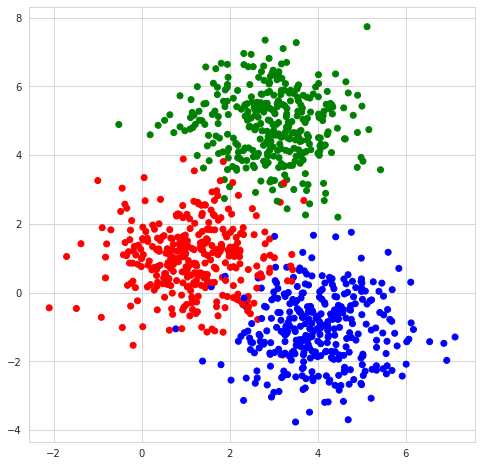

In [ ]:
plt.scatter(X[:, 0], X[:, 1], color=colors[y]);

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans

In [ ]:
cluster = MiniBatchKMeans(n_clusters=5, n_init=50)
cluster.fit(X, y)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=50, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

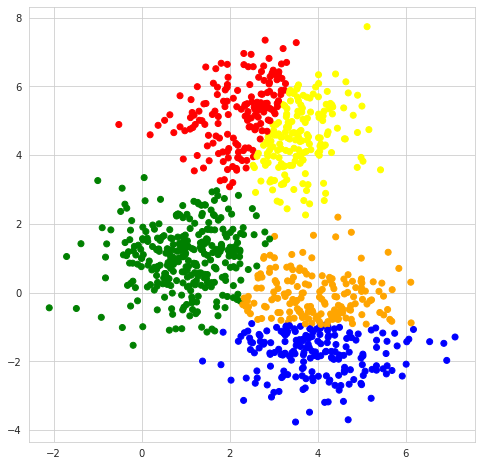

In [ ]:
plt.scatter(X[:, 0], X[:, 1], color=colors[cluster.labels_]);

In [ ]:
import time
from scipy.spatial.distance import cdist
from IPython.display import clear_output

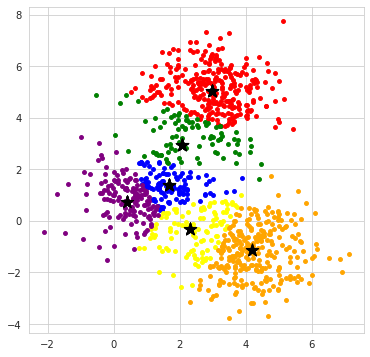

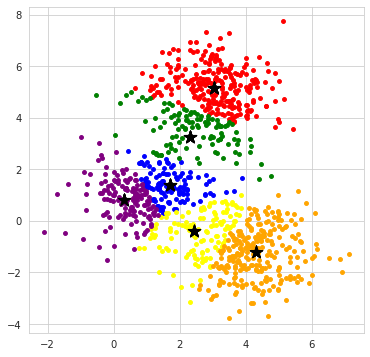

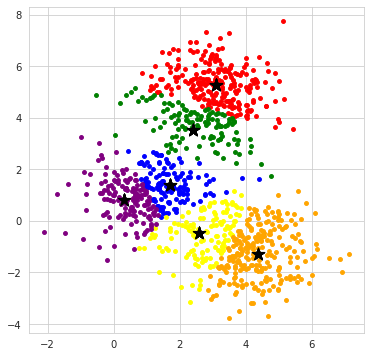

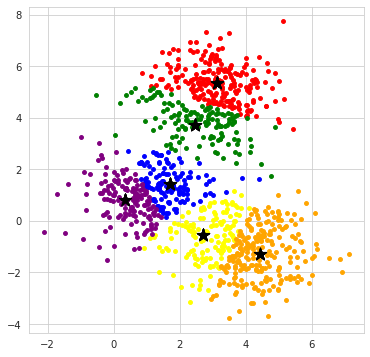

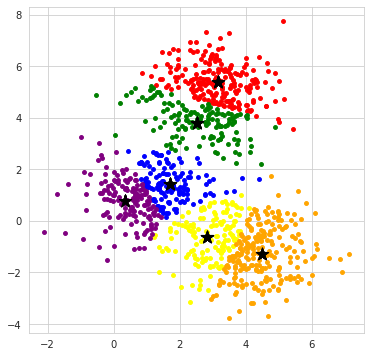

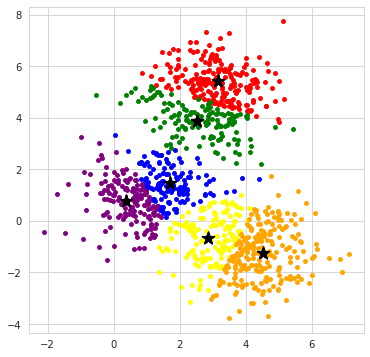

In [ ]:
k = 6
centers = X[np.random.randint(0, len(X), size=k)]

arg_distances = np.argsort(cdist(XA=X, XB=centers, metric='euclidean'), axis=1)

clusters_dict = {
    i: X[arg_distances[:, 0] == i] for i in range(k)
}
iter_ = 0
max_iter = 20
centers_dist_history = [np.inf]

while iter_ < max_iter and centers_dist_history[-1] > 1e-1:
    new_centers = np.array([clusters_dict[i].mean(axis=0) for i in range(k)])
    
    arg_distances = np.argsort(cdist(XA=X, XB=new_centers, metric='euclidean'), axis=1)

    clusters_dict = {
        i: X[arg_distances[:, 0] == i] for i in range(k)
    }
    centers_dist_history.append(np.linalg.norm(centers - new_centers))
    centers = new_centers
    
    iter_ += 1
    plt.figure(figsize=(6, 6))
    for i in range(k):
        plt.scatter(clusters_dict[i][:, 0], clusters_dict[i][:, 1], s=15, color=colors[i]);
        plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=170, color='black');
    # time.sleep(1)
    # clear_output(True)

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
data = mnist['data']
target = mnist['target'].astype(int)

In [ ]:
data.shape

(70000, 784)

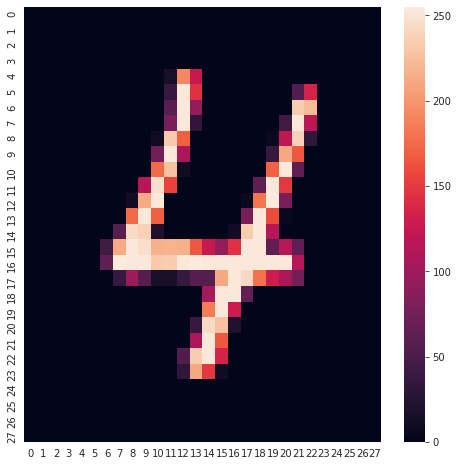

In [ ]:
k = np.random.randint(0, len(data))
sns.heatmap(data[k].reshape(28, 28));

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
%%time
pc = PCA(n_components=2)
pc.fit(data)
X_pc = pc.transform(data)

CPU times: user 4.42 s, sys: 1.77 s, total: 6.19 s
Wall time: 3.34 s


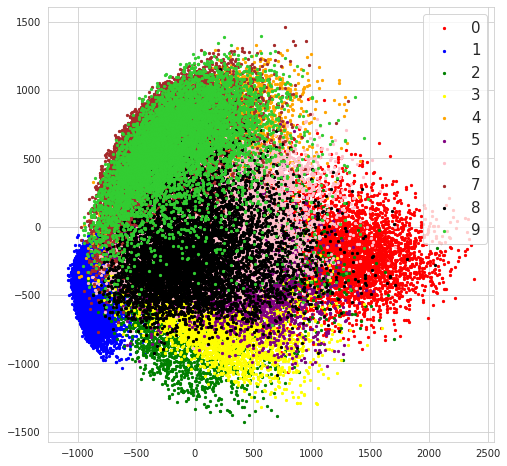

In [ ]:
for i in range(10):
    plt.scatter(X_pc[target == i, 0], X_pc[target == i, 1], color=colors[i], s=5, label=i);
plt.legend(fontsize=15);

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
%%time
idxs = np.random.randint(0, len(data), size=3000)
X_ts = TSNE(n_components=2).fit_transform(data[idxs])

CPU times: user 48.7 s, sys: 157 ms, total: 48.9 s
Wall time: 30 s


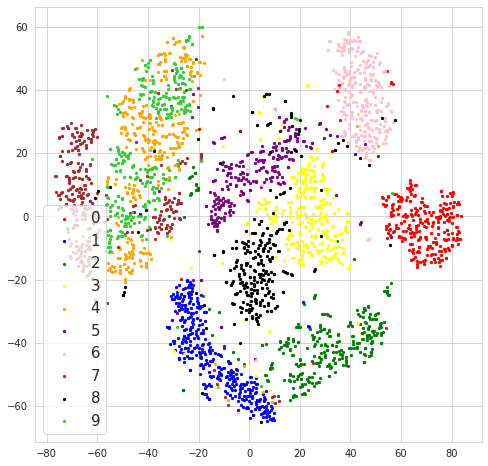

In [ ]:
for i in range(10):
    plt.scatter(X_ts[target[idxs] == i, 0], X_ts[target[idxs] == i, 1], color=colors[i], s=5, label=i);
plt.legend(fontsize=15);

In [ ]:
from sklearn.cluster import DBSCAN, MiniBatchKMeans

In [ ]:
all_colors = np.array(list(matplotlib.colors.cnames.keys()))

In [ ]:
# cluster = MiniBatchKMeans(n_clusters=10, n_init=40)
cluster = DBSCAN(eps=2.5, min_samples=5)
cluster.fit(X_ts)
# cluster.fit(data[idxs])
unq_clusters = np.unique(cluster.labels_)
print(unq_clusters.shape)

(44,)


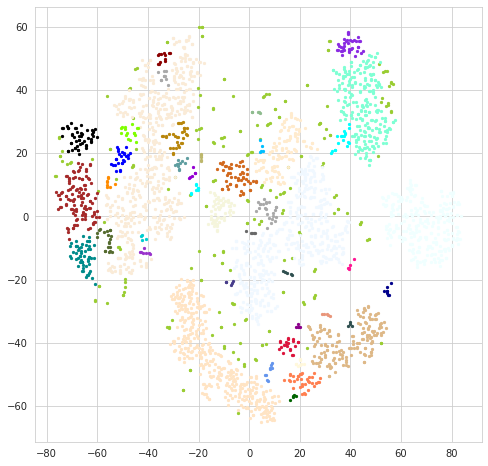

In [ ]:
for i in unq_clusters:
    plt.scatter(X_ts[cluster.labels_ == i, 0], X_ts[cluster.labels_ == i, 1], s=5, 
                color=all_colors[i]);